# Homework 5: Naive Bayes, Cross-Validation, and VC Dimension 
***

**Name**: Maxwell Lambek

***

This assignment is due on Moodle by **5pm on Wednesday April 18th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/CSCI-4622-Machine-Learning/blob/master/resources/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pickle, gzip
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [15 points] Problem 1 - Naive Bayes for Tennis Prediction 
***

Suppose you are trying to learn a person's decision whether to play tennis or not on a given day using features corresponding to precipitation forecast, temperature, humidity, and wind. You're given the following training data: 

$$
\begin{array}{c|c|c|c|c}
\textbf{Forecast} & \textbf{Temp} & \textbf{Humidity} & \textbf{Wind} & \textbf{PlayTennis} \\
\hline 
\textrm{sunny} & \textrm{hot} & \textrm{high} & \textrm{weak} & \textbf{No} \\ 
\textrm{sunny} & \textrm{hot} & \textrm{high} & \textrm{strong} & \textbf{No} \\ 
\textrm{overcast} & \textrm{hot} & \textrm{high} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{rainy} & \textrm{mild} & \textrm{high} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{rainy} & \textrm{cool} & \textrm{normal} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{rainy} & \textrm{cool} & \textrm{normal} & \textrm{strong} & \textbf{No} \\ 
\textrm{overcast} & \textrm{cool} & \textrm{normal} & \textrm{strong} & \textbf{Yes} \\ 
\textrm{sunny} & \textrm{mild} & \textrm{high} & \textrm{weak} & \textbf{No} \\ 
\textrm{sunny} & \textrm{cool} & \textrm{normal} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{rainy} & \textrm{mild} & \textrm{normal} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{sunny} & \textrm{mild} & \textrm{normal} & \textrm{strong} & \textbf{Yes} \\ 
\textrm{overcast} & \textrm{mild} & \textrm{high} & \textrm{strong} & \textbf{Yes} \\ 
\textrm{overcast} & \textrm{hot} & \textrm{normal} & \textrm{weak} & \textbf{Yes} \\ 
\textrm{rainy} & \textrm{mild} & \textrm{high} & \textrm{strong} & \textbf{No} \\ 
\end{array}
$$

**Part A**: Estimate the priors $p(\textrm{PlayTennis=Yes})$ and $p(\textrm{PlayTennis=No})$ from the training data. 



$p$(PlayTennis=Yes) = $\frac{9}{14}$

$p$(PlayTennis=No) = $\frac{5}{14}$

**Part B**: For each feature
- state the vocabulary $V$ for the feature 
- estimate the class-conditional probabilities $p(\textrm{feature value} \mid \textrm{PlayTennis})$ from the training data using Laplace add-one smoothing. Show your work. 

**Note**: There is no need to include any `UNK` features for this data. 

For the Forecast feature V = \{sunny, overcast, rainy\}

For the Temp feature V = \{hot, mild, cold\}

For the Humidity feature V = \{high, normal\}

For the Wind feature V = \{weak, strong\}

p(Forecast = sunny | yes) = $\frac{2 + 1}{9 + 3}= \frac{3}{12} $, p(Forecast = sunny | no) = $\frac{3 + 1}{5 + 3} = \frac{4}{8}$,

p(Forecast = overcast | yes) = $\frac{4 + 1}{9 + 3} = \frac{5}{12} $, p(Forecast = overcast | no) = $\frac{0 + 1}{5 + 3} = \frac{1}{8} $,

p(Forecast = rainy | yes) = $\frac{3 + 1}{9 + 3} = \frac{4}{12} $, p(Forecast = rainy | no) = $\frac{2 + 1}{5 + 3} = \frac{3}{8}$,


p(Temp = hot | yes) = $\frac{2 + 1}{9 + 3} = \frac{3}{12} $, p(Temp = hot | no) = $\frac{2 + 1}{5 + 3} = \frac{3}{8} $,

p(Temp = mild | yes) = $\frac{4 + 1}{9 + 3} = \frac{5}{12} $, p(Temp = mild | no) = $\frac{2 + 1}{5 + 3} = \frac{3}{8} $,

p(Temp = cold | yes) = $\frac{3 + 1}{9 + 3}= \frac{4}{12} $, p(Temp = cold | no) = $\frac{1 + 1}{5 + 3} = \frac{2}{8} $,


p(Humidity = high | yes) = $\frac{3 + 1}{9 + 2} = \frac{4}{11} $, p(Humidity = high | no) = $\frac{4 + 1}{5 + 2} = \frac{5}{7} $,

p(Humidity = normal | yes) = $\frac{6 + 1}{9 + 2} = \frac{7}{11} $, p(Humidity = normal | no) = $\frac{1 + 1}{5 + 2} = \frac{2}{7} $,

p(Wind = strong | yes) = $\frac{3 + 1}{9 + 2} = \frac{4}{11} $, p(Wind = strong | no) = $\frac{3 + 1}{5 + 2} = \frac{4}{7} $,

p(Wind = weak | yes) = $\frac{6 + 1}{9 + 2} =\frac{7}{11} $, p(Wind = weak | no) = $\frac{2 + 1}{5 + 2} = \frac{3}{7} $,



**Part C**: What would your Naive Bayes model predict for the following two weather conditions. Show all work.  
- **Forecast**=overcast, **Temp**=cool, **Humidity**=high, **Wind**=weak  
- **Forecast**=sunny, **Temp**=hot, **Humidity**=normal, **Wind**=strong  

$p(no|x)= p(x|no)p(no) \approx \hat{p}(overcast|no)*\hat{p}(cool|no)*\hat{p}(high|no)\hat{p}(weak|no)* \hat{p}(no) = \frac{1}{8} \frac{2}{8} \frac{5}{7} \frac{3}{7} \frac{5}{14} = 0.0034165 $

$p(yes|x)= p(x|yes)p(yes) \approx \hat{p}(overcast|yes)*\hat{p}(cool|yes)*\hat{p}(high|yes)\hat{p}(weak|yes) * \hat{p}(yes)= \frac{5}{12} \frac{4}{12} \frac{4}{11} \frac{7}{11} \frac{9}{14} = 0.02066 $

Since $p(yes|x)$ is higher the naive bayes model would predict Yes.

$p(no|x)= p(x|no)p(no) \approx \hat{p}(sunny|no)*\hat{p}(hot|no)*\hat{p}(normal|no)\hat{p}(strong|no)* \hat{p}(no) = \frac{4}{8} \frac{3}{8} \frac{2}{7} \frac{4}{7} \frac{5}{14} = 0.0109 $


$p(yes|x)= p(x|yes)p(yes) \approx \hat{p}(sunny|yes)*\hat{p}(hot|yes)*\hat{p}(normal|yes)\hat{p}(strong|yes) \hat{p}(yes) =\frac{3}{12} \frac{3}{12} \frac{7}{11} \frac{4}{11} \frac{9}{14} = 0.0093 $

Since $p(no|x)$ is higher the naive bayes model would predict No.


### [35 points] Problem 2 - Implementing Discrete Naive Bayes for Text Classification 
***

In this problem you'll implement a general Discrete Naive Bayes class for text classification. Your tasks will be to implement `train`, `predict_log_score`, and `predict` routines to learn the Naive Bayes model parameters from a collection on text and make predictions on unseen validation data. 

The skeleton for the `TextNB` class is below. Note that this class is fairly similar to the one you worked with in the Hands-On Naive Bayes in-class notebook, so you should look there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests.

**Important Note**: In Problem 3 we'll be using the `TextNB` class to make predictions about Twitter data.  Since real-world text data typically has a large number of features, you'll want to make your implementation reasonably efficient so that your experiments in Problem 3 don't take forever. 


In [2]:
class TextNB:
    def __init__(self, text_train, y_train, alpha=1.0):
        """
        :param text_train: a list or ndarray of text strings to use as training data 
        :param y_train: an ndarray of true labels associated with the text data 
        :param alpha: the Laplace smoothing parameter 
        """
        
        # store training data 
        self.text_train = text_train 
        self.y_train = y_train 
        
        # store smoothing parameter
        self.alpha = alpha 
        
        # get number of classes 
        self.num_classes = len(set(y_train))
        
        # initialize vocab to feature map 
        self.vocab = dict() 
        
        # initialize class counts 
        self.class_counts = np.zeros(self.num_classes, dtype=int)
        
        # initialize feature counts (Note, will need to update this with the correct
        # number of columns during the training process)
        self.feature_counts = np.zeros((self.num_classes, 0), dtype=int)
        
    def train(self):
        """
        Learn the vocabularly, class_counts, and feature counts from the training data 
        """
        

        loc = 0
        for ii in range(len(self.text_train)):
            s = self.text_train[ii].split()
            for jj in range(len(s)):
                try:
                    self.vocab[s[jj]]
                except KeyError:
                    self.vocab[s[jj]] = loc
                    loc = loc + 1
                
        self.class_counts[0] = np.sum(self.y_train == 0)
        self.class_counts[1] = np.sum(self.y_train == 1)
                    
                    
                
        # initialize feature counts 
        self.feature_counts = np.zeros((self.num_classes, len(self.vocab)), dtype=int)

        for ii in range(len(self.text_train)):
            s = self.text_train[ii].split()
            for jj in range(len(s)):
                self.feature_counts[self.y_train[ii],self.vocab[s[jj]]] = self.feature_counts[self.y_train[ii],self.vocab[s[jj]]] + 1
                
    def predict_log_score(self, text_str):
        """
        Get the log-probability score for each class
        for a query string
        
        :param text_str: a single string of text to compute the log_score for 
        """
        
        
        s = text_str.split()
        p0 = 0.0
        p1 = 0.0
        for ii in range(len(s)):
            try:
                up0 = self.feature_counts[0,self.vocab[s[ii]]] + self.alpha
                low0 = np.sum(self.feature_counts[0,:])+len(self.vocab)*self.alpha
                p0 = p0 + np.log(up0/low0)

                up1 = self.feature_counts[1,self.vocab[s[ii]]] + self.alpha
                low1 = np.sum(self.feature_counts[1,:])+len(self.vocab)*self.alpha
                p1 = p1 + np.log(up1/low1)
            except KeyError:
                pass
                #print("ignored,", s[ii])
        pclass0 = np.log((self.class_counts[0] + self.alpha)/(self.class_counts[0] + self.class_counts[1] + 2*self.alpha))
        pclass1 = np.log((self.class_counts[1] + self.alpha)/(self.class_counts[0] + self.class_counts[1] + 2*self.alpha))
        
        class_scores = np.zeros(self.num_classes) 
        class_scores[0] = p0+pclass0
        class_scores[1] = p1 + pclass1
        
        
        return class_scores
        
    
    def predict(self, text_list):
        """
        Predict the class of each example in text_list  
        
        :param text_list: a list or ndarray of text strings to make predictions on 
        """
        
        # TODO 
        
        yhat = np.zeros(len(text_list), dtype=int)
        for ii in range(len(text_list)):
            yhat[ii] = np.argmax(self.predict_log_score(text_list[ii]))
        return yhat 
        
        
    def accuracy(self, text_list, y_true):
        """
        Make predictions on texts in text_list and compute accuracy relative to 
        true labels in y_true 
        
        :param text_list: a list or ndarray of text strings to make predictions on 
        :param y_list: an ndarray of true labels associated with the text data 
        """
        yhat = self.predict(text_list)
        return np.sum(yhat == y_true)/len(y_true)
        
        

**Part A**: Complete the `train` function in the `TextNB` class to prepare to make Naive Bayes predictions using Laplace smoothing.  In this routine you will need to populate the following data structures: 

`self.vocab`: A Python dictionary that maps distinct terms found in the training set to unique indices in $\{0, 1, \ldots, |V|-1\}$.  This will allow us to quickly look up frequency counts for an encountered term in a Numpy array. Note that while the data is fairly clean (We've removed punctuation and made all characters lowercase) you should take care that you're not accidentally counting whitespace in the vocabulary. 

`self.class_counts`: A 1D Numpy array of length `self.num_classes` which counts the number of documents in the training set that belong to each class. 

`self.feature_counts`: A 2D Numpy array of dimensions `self.num_classes` $\times$ $|V|$. The $(c,k)$-entry in this array should be the number of times that term $k$ appears in documents belonging to class $c$. Note that we're using the Bag-of-Words approach here, so if a term appears multiple times in a single document, each instance of that term should be counted.  

When you think you're done, execute the following unit test, corresponding to the example starting on Slide 29 of [Lecture 24](https://www.cs.colorado.edu/~ketelsen/files/courses/csci4622/slides/lesson24.pdf). 

In [3]:
%run -i tests/tests.py "prob 2A"

testVocab (__main__.TestNB) ... ok
testClassCounts (__main__.TestNB) ... ok
testFeatureCounts (__main__.TestNB) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK


**Part B**: Complete the `predict_log_score` function in the `TextNB` class to take in a single string of text and compute the associated log-score for each class. For now, you should use add-one Laplace smoothing for both the class-priors and the class-conditional probabilities.  In **Problem 3** we'll experiment with different variants of Laplace smoothing, so if you like you can read ahead now and implement the general version of Laplace smoothing from the beginning.  

**Note**: For simplicity and testing purposes, do not implement an `UNK` feature.  Instead, if you encounter a term not in the vocabulary you can safely ignore it. 

When you think your `predict_log_score` function is working well, execute the following unit test. 


In [4]:
%run -i tests/tests.py "prob 2B"

testLogScore (__main__.TestNB) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


**Part C**: Finally, implement the `predict` method to take in a list or ndarray of text data, call `predict_log_score`, and return a vector of predicted labels. 

When you think you're done, execute the following unit test. 

In [5]:
%run -i tests/tests.py "prob 2C"

testPredict (__main__.TestNB) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


### [30 points] Problem 3: Predicting the Sentiment of Tweets sent from Passengers to Airlines 
***

In this problem you'll use the `TextNB` class you wrote in **Problem 2** to make predictions about the sentiment of tweets sent by passengers to airlines.  Execute the following cell to load the data. 

In [6]:
f = open('data/airline_tweets.pklz','rb')
text_train, y_train, text_valid, y_valid, text_all, y_all = pickle.load(f)
f.close()

**Part A**: Explore the data and answer the following questions: 

- How many total examples are there in the training and validation sets? 
- Which binary label ($\{0,1\}$) corresponds to tweets with positive and negative sentiment, respectively?
- What percentage of tweets in the training set have true positive sentiment? 
- What percentage of tweets in the validation set have true positive sentiment? 

In [7]:
print(np.sum(y_train == 0))
print(np.sum(y_train == 1))

print(np.sum(y_valid == 0))
print(np.sum(y_valid == 1))
print(y_train)
print(text_train)#1 is positive, and 0 is negative

3000
1000
3077
923
[1 0 0 ..., 0 0 0]
['@southwestair awesome  thanks'
 '@usairways good news weve located the crew and made contact with them flight was supposed to leave 4 minutes ago usairwaysfail'
 '@usairways 45 minute delay for take off and 30 minute wait for checked bags really'
 ...,
 '@southwestair will continue to be my airline of choice @united most frustrating travel day ive experienced 5 delays and 4 gate changes'
 '@americanair would it be ok to send you a dm asking a few questions because im and been on hold so long'
 '@united this is it last time i fly unitedairlines  you screw up every trip now will be stuck in ord and miss work']


There are 4000 examples in the training set, and 4000 examples in the validation set.

The binary label 0 corresponds to negative sentiment, which can be seen very clearly in the third training example. The binary label 1 corresponds to positive sentiment, as seen in the first training example.

$\frac{1000}{4000} = 25\%$ of the tweets in the training set have true positive sentiment.

$\frac{923}{4000} = 23.075\%$ of the tweets in the validation set have true positive sentiment.


**Part B**: Use your `TextNB` class to learn a Naive Bayes classifier for the airline Twitter data.  What accuracy do you achieve on the training set and what accuracy do you achieve on the test set? 


In [8]:
nb = TextNB(text_train, y_train)
nb.train()
acc_train = nb.accuracy(text_train, y_train)
acc_valid = nb.accuracy(text_valid, y_valid)

In [9]:
print(acc_train,acc_valid)

0.9305 0.91075


**Part C**: Notice that if we want to make improvements in our Naive Bayes classifier, we don't really have a lot of knobs to turn aside from changing the word features that we use.  One place that we might make some gains though is in using a slightly different version of Laplace smoothing.  

Recall that in add-one smoothing we add a $1$ to the numerator in both the estimation of the prior probabilities and the class-conditional likelihoods. 

$$
\hat{p}(\textrm{Class}) = \dfrac{\textrm{# docs from Class}+1}{\textrm{# total docs in training data} + |C|},
\quad \quad
\hat{p}(\textrm{term} \mid \textrm{Class}) = \dfrac{\textrm{# instance of term in Class}+1}{\textrm{# total words in Class} + |V|}
$$

It turns out there's nothing sacred about adding $1$ to the numerators.  In fact, we can add any positive value $\alpha$ that we like 

$$
\hat{p}(\textrm{Class}) = \dfrac{\textrm{# docs from Class}+\alpha}{\textrm{# total docs in training data} + ?},
\quad \quad
\hat{p}(\textrm{term} \mid \textrm{Class}) = \dfrac{\textrm{# instance of term in Class}+\alpha}{\textrm{# total words in Class} + ?}
$$

Explain what modification must be made to the denominators so that theses estimates remain valid probabilities. Clearly justify your reasoning. 

Support this modification in your `TextNB` class above, if you have not already.  Make sure that your code still passes then unit tests when $\alpha = 1$. 

The modification that needs to happen is we need to add $\alpha * |C|$ to the denominator for $\hat{p}(Class)$ and $\alpha * |V|$ for  $\hat{p}(term|Class)$. This is because we are adding $\alpha$ to each class or term. So, in order to remain as a probability we need to divide by the total amount of $\alpha$'s we add, which is $\alpha * |C|$ or $\alpha * |V|$.

In [10]:
nb = TextNB(text_train, y_train,alpha=0.5)
nb.train()
acc_train = nb.accuracy(text_train, y_train)
acc_valid = nb.accuracy(text_valid, y_valid)
print(acc_train,acc_valid)

0.9365 0.914


**Part D**: Write some code to perform $K$-Folds cross-validation on the entire data set (`train_all` and `y_all`) to estimate the accuracy of your NB classifier for various values of $\alpha$ and make a plot showing your results.  

To do the partitioning into folds I recommend leveraging sklearn's [StratifiedKFold]() routine.  The documentation demonstrates how it can be used.  

For your plot, use at least $K=5$ folds and at least $5$ different values of $\alpha$ between $0.1$ and $1.5$.  Which value of $\alpha$ seems to perform the best? 


In [11]:
from sklearn.model_selection import StratifiedKFold
k = 5
skf = StratifiedKFold(n_splits=k)
acc_train = []
acc_valid = []
#skf.get_n_splits(text_all, y_all)
for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=0.8)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)

In [12]:
print(acc_valid)

[0.91692692067457837, 0.89444097439100567, 0.91437500000000005, 0.91619762351469669, 0.9130706691682301]


In [14]:
from sklearn.model_selection import StratifiedKFold
k = 5
skf = StratifiedKFold(n_splits=k)
acc_train = []
acc_valid = []
#skf.get_n_splits(text_all, y_all)
for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=1)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha1CV = np.mean(acc_valid)
print(alpha1CV)
for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=0.5)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha05CV = np.mean(acc_valid)
print(alpha05CV)

for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=0.1)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha01CV = np.mean(acc_valid)
print(alpha01CV)

for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=1.5)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha15CV = np.mean(acc_valid)
print(alpha15CV)


for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(Xt, yt,alpha=0.8)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha08CV = np.mean(acc_valid)
print(alpha08CV)
    

0.910378018605
0.911377823658
0.91104445114
0.910940069642
0.910952503224


In [15]:
for train_index, test_index in skf.split(text_all, y_all):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xt, Xv = text_all[train_index], text_all[test_index]
    yt, yv = y_all[train_index], y_all[test_index]
    nb = TextNB(text_train, y_train,alpha=0.2)
    nb.train()
    acc_train =acc_train + [nb.accuracy(Xt, yt)]
    acc_valid = acc_valid + [nb.accuracy(Xv, yv)]
    #print(acc_train,acc_valid)
alpha02CV = np.mean(acc_valid)
print(alpha02CV)

0.913709087403


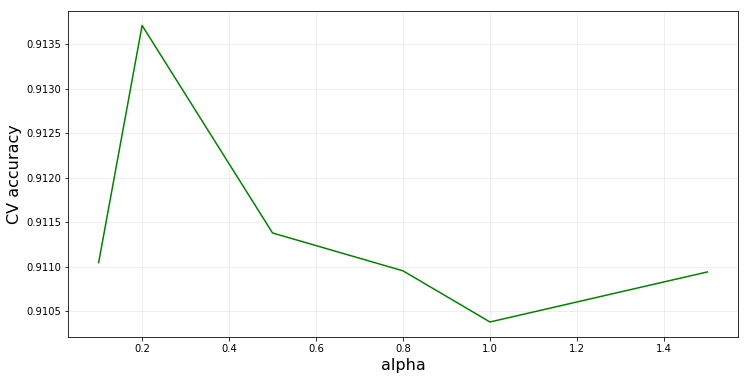

In [16]:
ep = [0.1,0.2,0.5,0.8,1,1.5] 
yax = [alpha01CV,alpha02CV, alpha05CV, alpha08CV, alpha1CV, alpha15CV]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(ep,yax, color = "green")
ax.set_xlabel("alpha", fontsize=16)
ax.set_ylabel("CV accuracy", fontsize=16);
ax.grid(alpha=0.25)
ax.legend(loc="lower right", fontsize=16);

$\alpha = 0.2$ seems to preform the best. The optimal $\alpha$ value is probably not $0.2$ but it is close.

### [20 points] Problem 4: VC Dimension 
***

**Part A**: Consider learning to classify binary labeled data with a single feature $x$.  Let $H$ be the hypothesis class described by the union of two intervals $[a,b] \cup [c,d]$ such that $h(x)$ labels an example as positive if it's in the interval $[a,b]$ **OR** the interval $[c,d]$.  Determine the VC Dimension of $H$.  Justify your conclusion by demonstrating a shattering of a set $S$ of the appropriate size **AND** by arguing that an arbitrary set consisting of one additional point cannot be shattered by $H$.   

The VC Dimension of H is 4.

Step1: show for 4 points. Let 0 be negative and 1 be positive and [] represent an inerval [a,b] or [c,d]

[1111] [] $\hspace{1cm}$ [111]0 [] $\hspace{1cm}$ [11]0[1] $\hspace{1cm}$ [1]0[11] $\hspace{1cm}$ []0[111]

[11]00[] $\hspace{1cm}$ [1]0[1]0 $\hspace{1cm}$ 0[11]0[] $\hspace{1cm}$ 0[1]0[1] $\hspace{1cm}$ []00[11]

[1]000[] $\hspace{1cm}$ 0[1]00 $\hspace{1cm}$ 00[1]0[] $\hspace{1cm}$ 000[1] $\hspace{1cm}$ []0000[]

Now, since all sets S such that $|S| = 4$ have been correctly classified the set $S$ has been shattered $ \implies VCdim(H) \geq 4$.

Step2: show it cannot be done for 5 points.

[1]0[1]01 but then 1 point is missclassifed. [1]010[1] again, 1 point missclassified. 10[1]0[1], [101]0[1], [1]0[101]. So, as you can see no matter how I place the two intervals $[a,b]$ and $[c,d]$ one point or more is missclassifed, and therefore $4 \leq VCdim(H) < 5 \implies VCdim(H)  = 4$


**Part B**: Consider learning to classify binary labeled data with two features, $x_1$ and $x_2$.  Let $H$ be the hypothesis class described by the ability to assign all points in a particular quadrant of the 2D plane to be positive or negative, with the restriction that at least one of the four quadrants must be labeled positive and at least one of the four quadrants must be labeled negative. Determine the VC Dimension of $H$. Again, justify your conclusion by demonstrating a shattering of a set $S$ of the appropriate size **AND** by arguing that an arbitrary set consisting of one additional point cannot be shattered by $H$.   

The $VCdim(H) = 4$.

Step1: show for 4 points.

In [201]:

        |1 1
     ___|___    #The first quadrant is negative and all others are positive
      1 | 1
        |
        
     1  | 0
     ___|___   #The 2nd quadrant is neagtive and all others are positive. All other placements of the 0
      1 | 1    # can be handeled by rotating the axis to get back to this situation.
        |
        

        
        
      1 | 0
     ___|___ #The 4th quadrant and 2nd quadrant is negative and all others are positive
      1 | 0  # rotations cover all other setups like this
        |
        
        
    1   | 0
     ___|___  #The 4th quadrant is positive and all others are negative
      0 | 1  # again, rotations cover the other setups with this structure
        |

        
        
        
    1   | 0
     ___|___ #The 1st quadrant is positive and all others are negative
      0 | 0  #rotations again
        |
      
        |0 0
     ___|___ #The 1st quadrant is positive and all others are negative
      0 | 0
        |
        

IndentationError: unexpected indent (<ipython-input-201-ffd35b229113>, line 2)

Now, since all sets S such that $|S| = 4$ have been correctly classified the set $S$ has been shattered $ \implies VCdim(H) \geq 4$.

Step2: showing this cannot be done for 5 points,


In [ ]:
      1 |0 1  #no matter what quadrant I assign to be negative there will be a positive that is
     ___|___  # missclassified. Also, rotations on the axis/points wont work either because the
      1 | 1   # top row cannot be seperated.
        |

So, $4 \leq VCdim(H) <5 \implies VCdim(H) = 4$